# Automated EDA

This Capstone Project involves building an Automated EDA (Exploratory Data Analysis) tool that can pre-process and visualize data based on column types using Python. The tool aims to simplify the EDA process by automating the pre-processing steps and providing a comprehensive visualization dashboard for each column type.



In [15]:
# Import required librarieees 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.decomposition import PCA

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.decomposition import PCA

class AutomatedEDA:
    def load_data(self, file_path, format_type):
        if format_type == 'csv':
            print('Start Data Loading')
            data = pd.read_csv(file_path)
            print('Data Loaded')
        elif format_type == 'excel':
            data = pd.read_excel(file_path)
        else:
            print("Unsupported format")
            return None
        return data
    
    def preprocess_data(self, data):
        # Handle missing values
        print('Handle missing values')
        data.fillna(data.mean(), inplace=True)
        print('Done')
        
        # Encode categorical features using OneHotEncoder
        print('Encode categorical features using OneHotEncoder')
        categorical_cols = data.select_dtypes(include=[object]).columns
        encoder = OneHotEncoder(sparse=False, drop='first')
        encoded_cols = pd.DataFrame(encoder.fit_transform(data[categorical_cols]))
        encoded_cols.columns = encoder.get_feature_names_out(categorical_cols)
        data = pd.concat([data, encoded_cols], axis=1)
        data.drop(columns=categorical_cols, inplace=True)
        print('Done')
        
              
        # Scale numeric features using StandardScaler
        print('Scale numeric features using StandardScaler')
        scaler = StandardScaler()
        numeric_cols = data.select_dtypes(include=[float, int]).columns
        data[numeric_cols] = scaler.fit_transform(data[numeric_cols])
        print('Done')
        print(data)
        
        return data
    
    def plot_histograms(self, data):
        print('Start vis1')
        for column in data.columns:
            if data[column].dtype in [float, int]:
                plt.figure(figsize=(8, 6))
                plt.hist(data[column], bins=20, color='skyblue', edgecolor='black')
                plt.xlabel(column)
                plt.ylabel('Frequency')
                plt.title(f'Histogram of {column}')
                plt.show()
        print('Done')
        
   
    def plot_interactive_histograms(self, data):
        print('Start vis2')
        for column in data.columns:
            if data[column].dtype in [float, int]:
                fig = px.histogram(data, x=column, nbins=20, title=f'Histogram of {column}')
                fig.show()
        print('Done')
        







Please enter file name:BankChurners.csv
Please enter file type:csv
File is: BankChurners.csv
Start Data Loading
Data Loaded
Handle missing values
Done
Encode categorical features using OneHotEncoder
Done
Scale numeric features using StandardScaler
Done
       CLIENTNUM  Customer_Age  Dependent_count  Months_on_book  \
0       0.802878     -0.165406         0.503368        0.384621   
1       2.156861      0.333570         2.043199        1.010715   
2      -0.682769      0.583058         0.503368        0.008965   
3       0.832862     -0.789126         1.273283       -0.241473   
4      -0.814896     -0.789126         0.503368       -1.869317   
...          ...           ...              ...             ...   
10122   0.899389      0.458314        -0.266547        0.509840   
10123  -0.773384     -0.664382        -0.266547       -1.368442   
10124  -0.614372     -0.290150        -1.036462        0.008965   
10125  -0.589958     -2.036565        -0.266547        0.008965   
10126  -0.

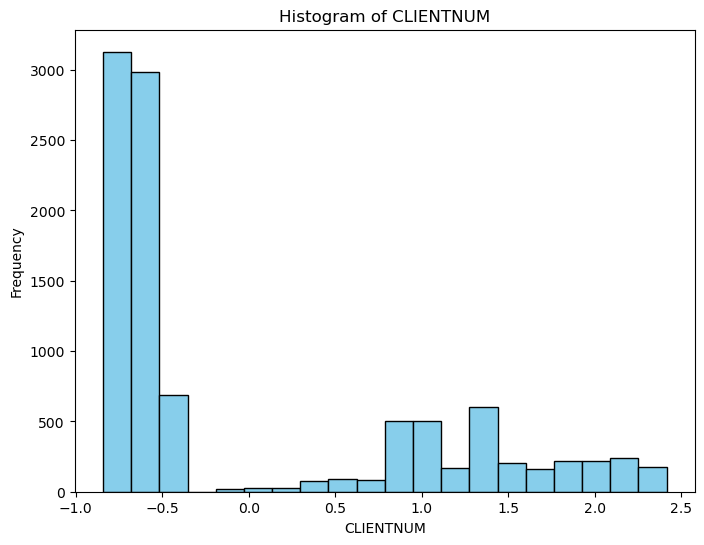

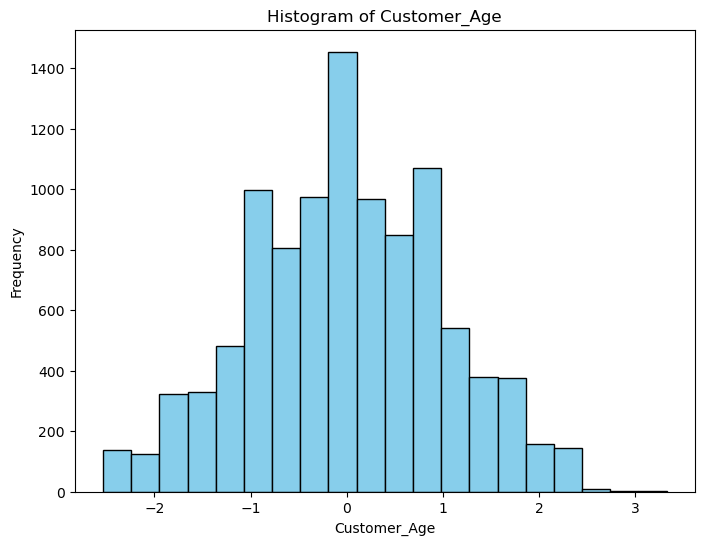

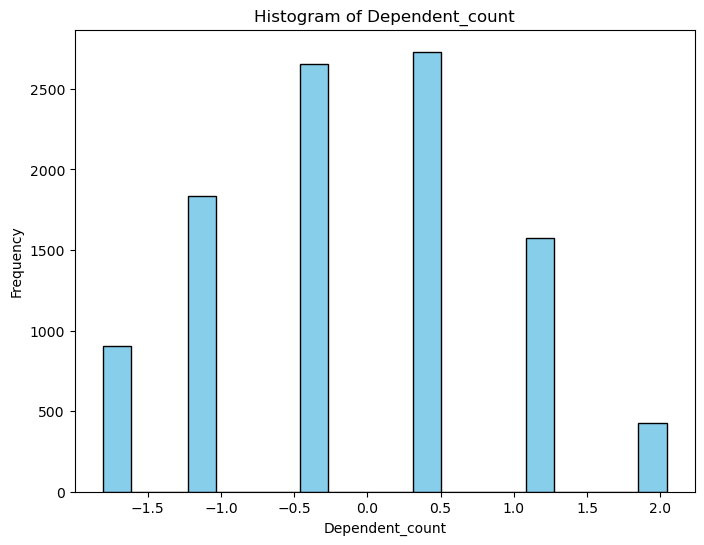

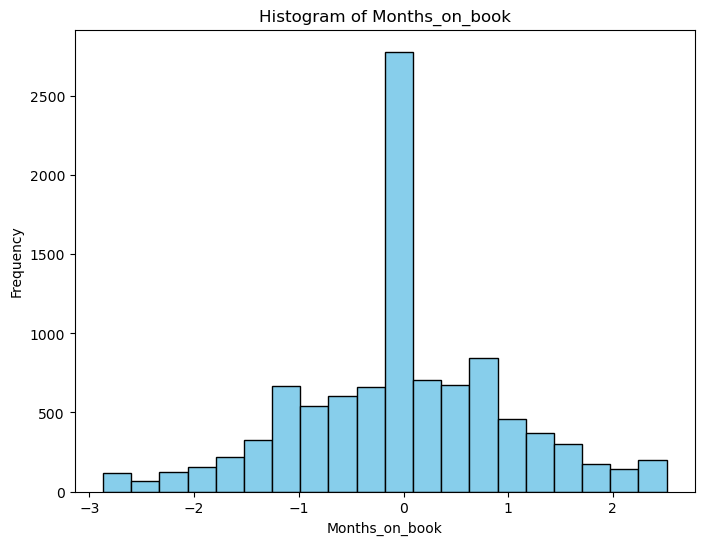

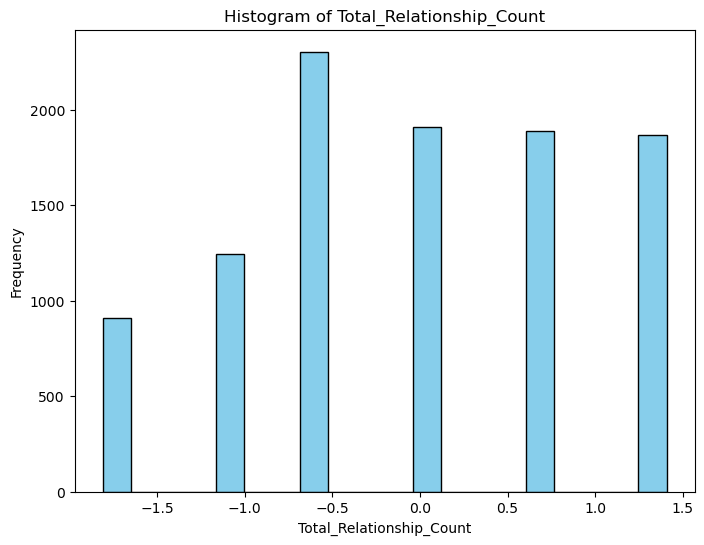

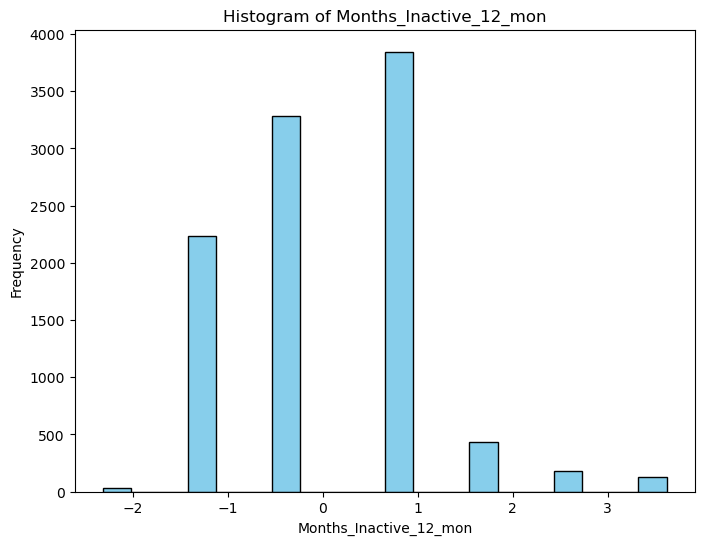

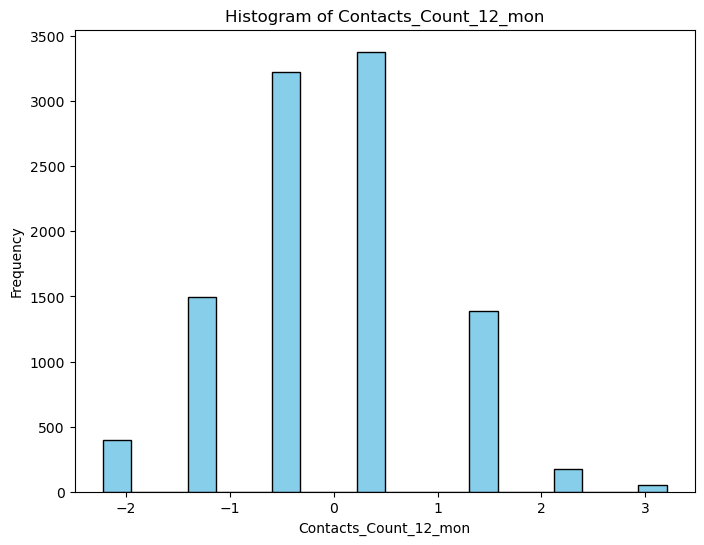

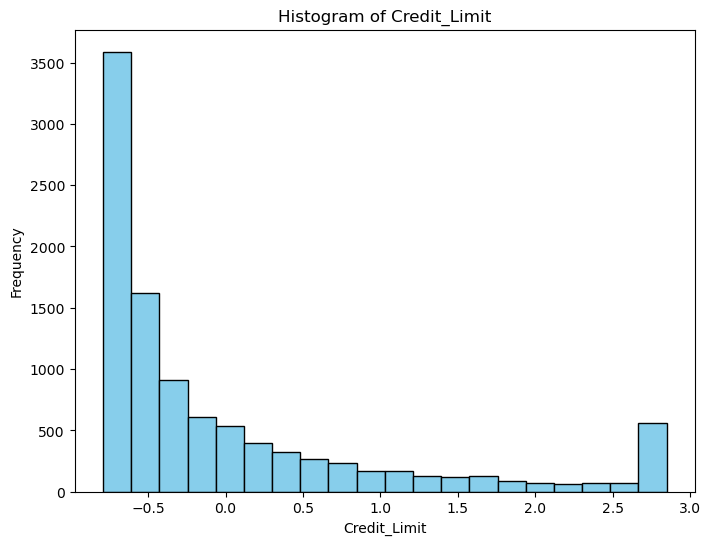

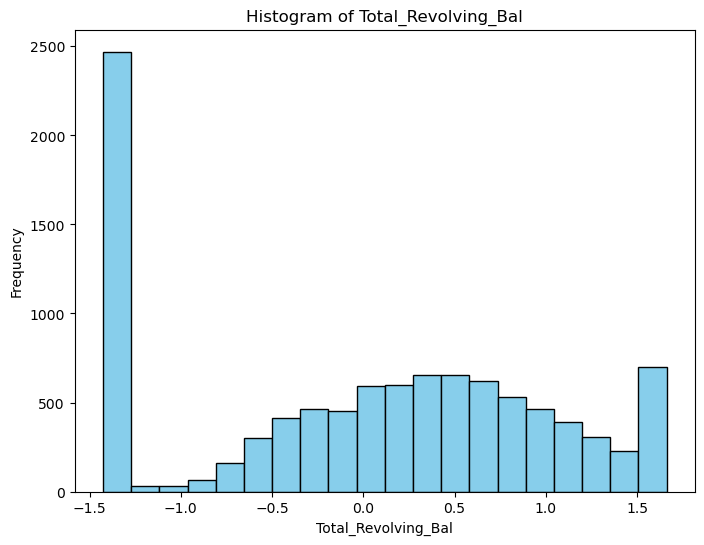

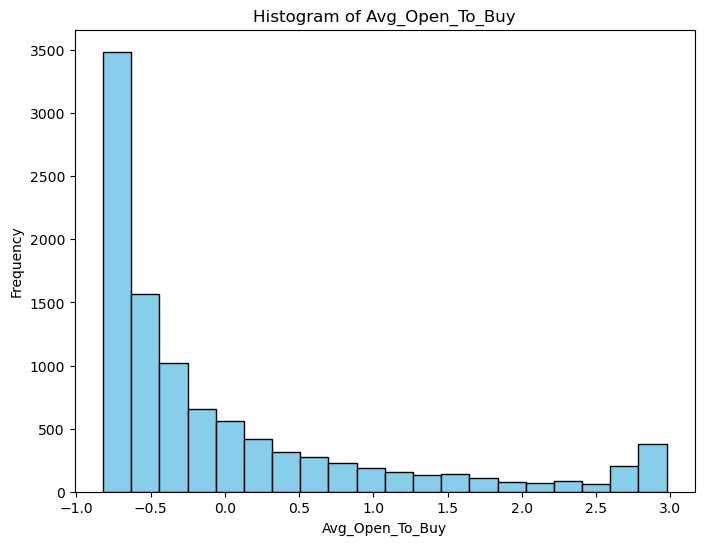

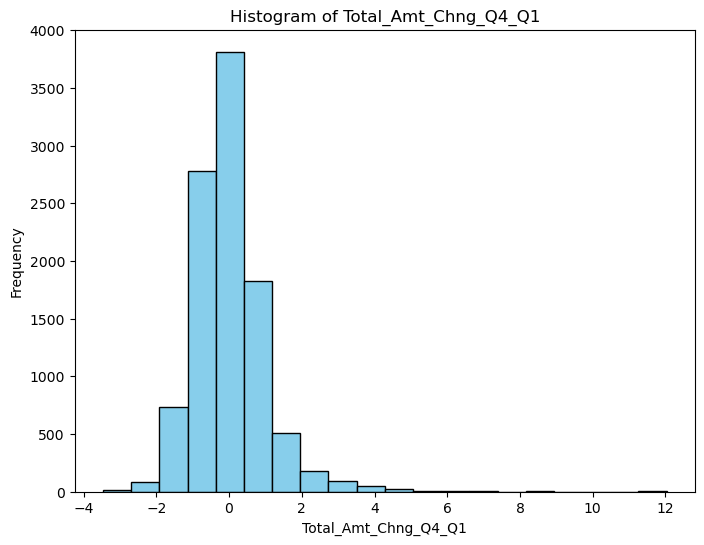

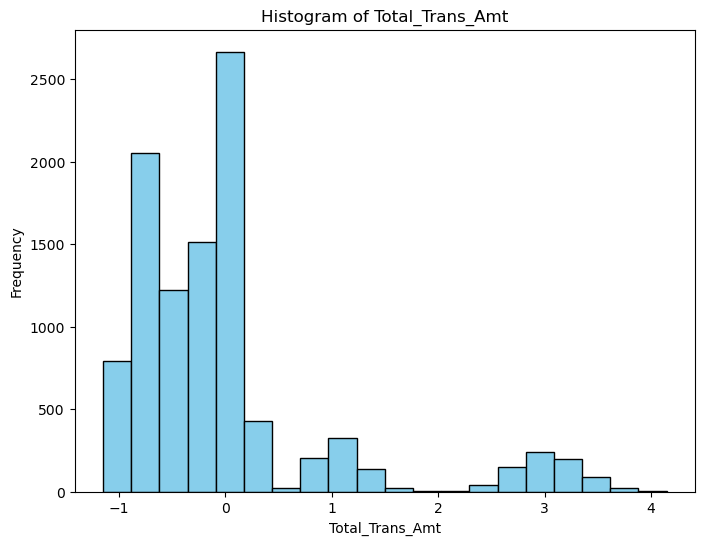

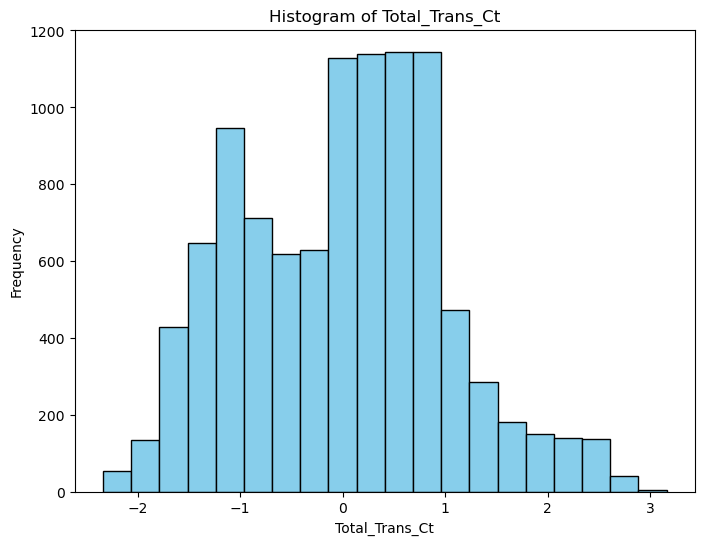

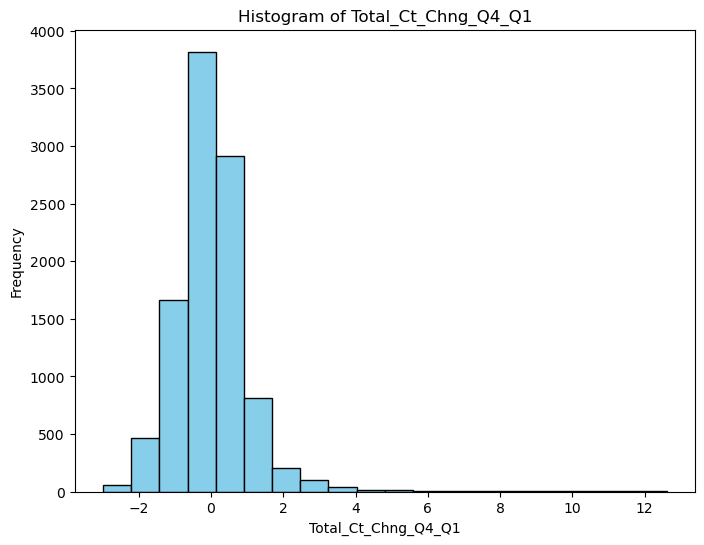

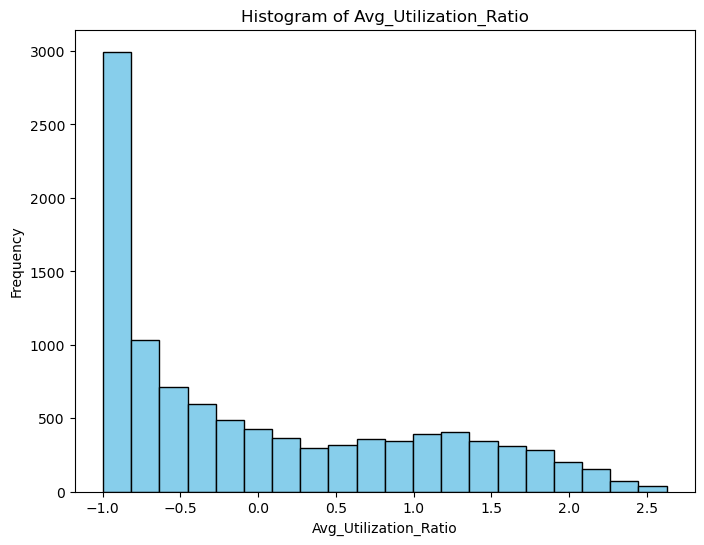

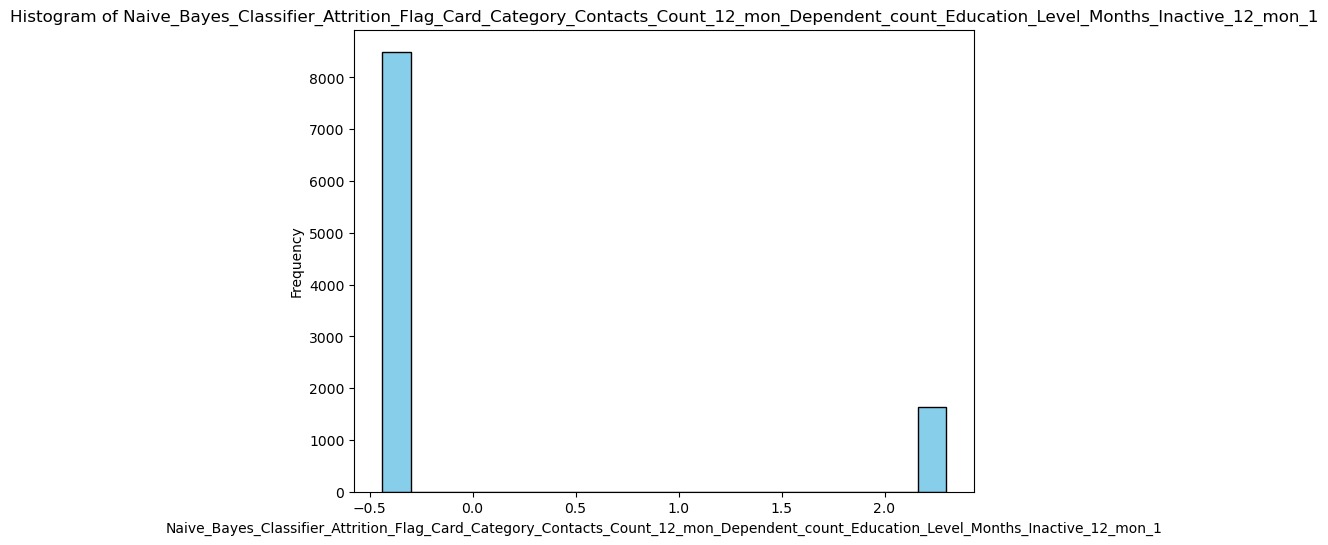

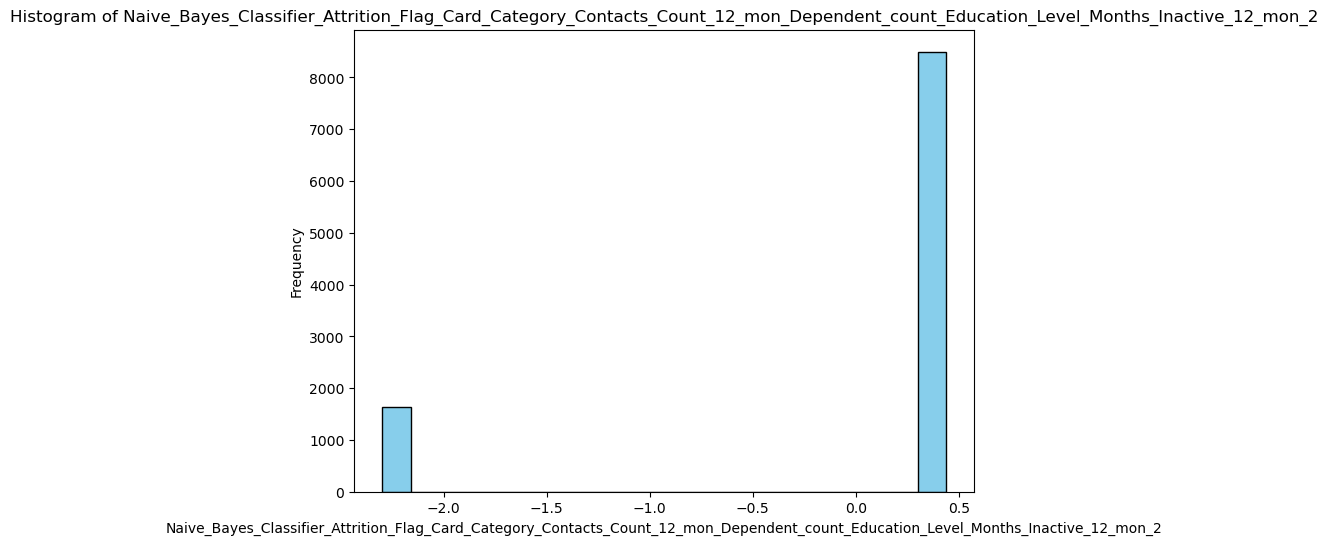

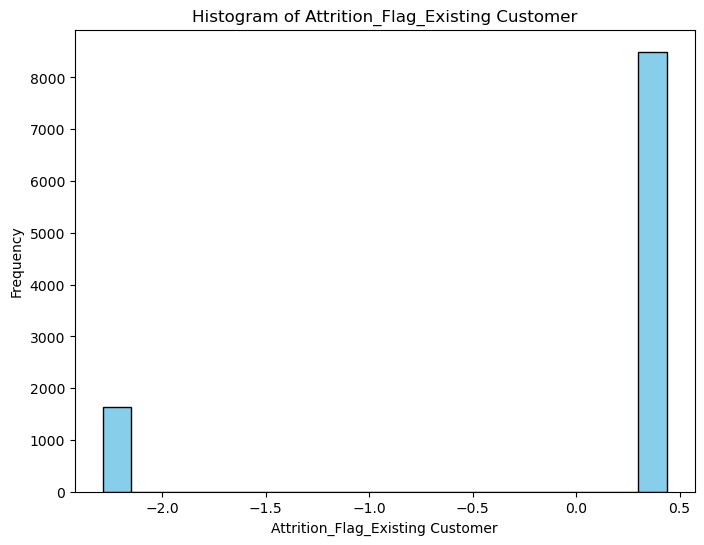

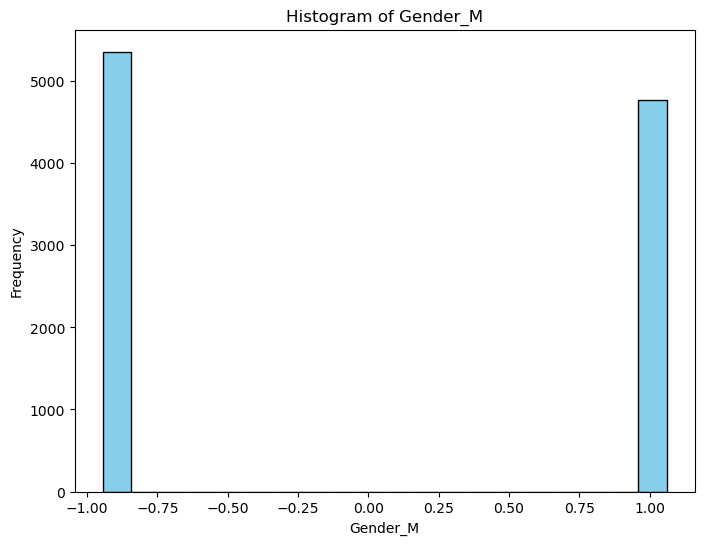

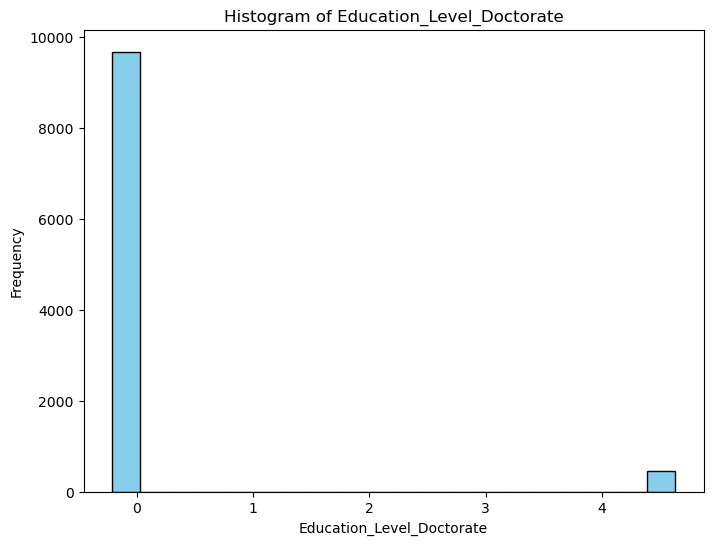

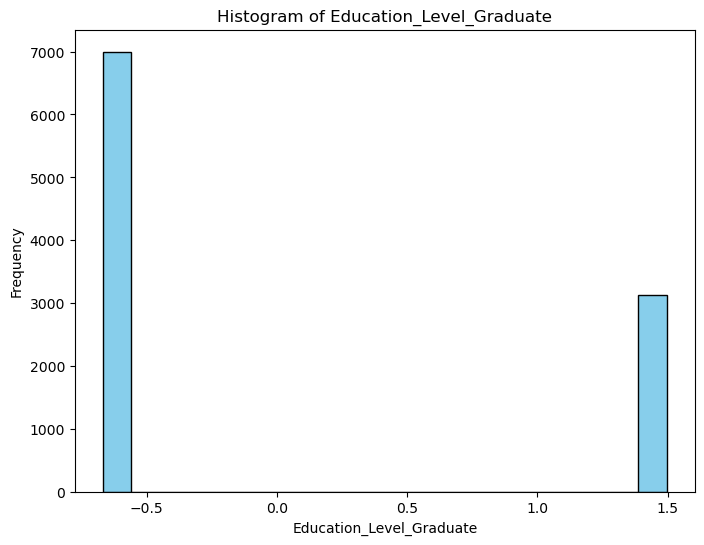

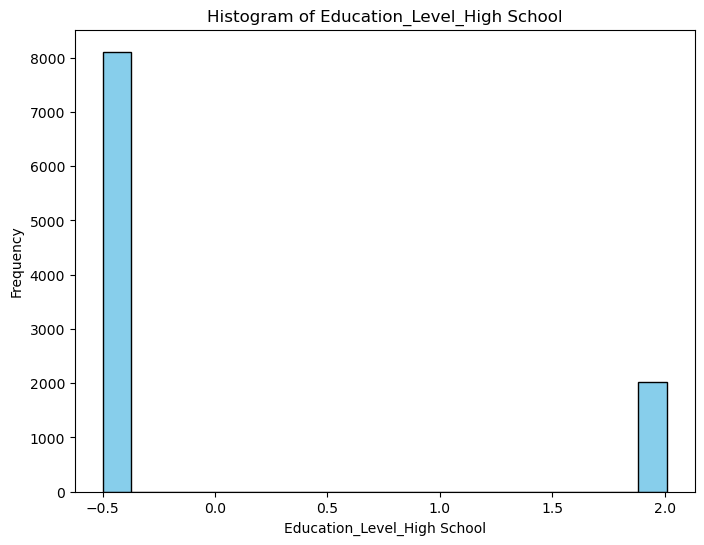

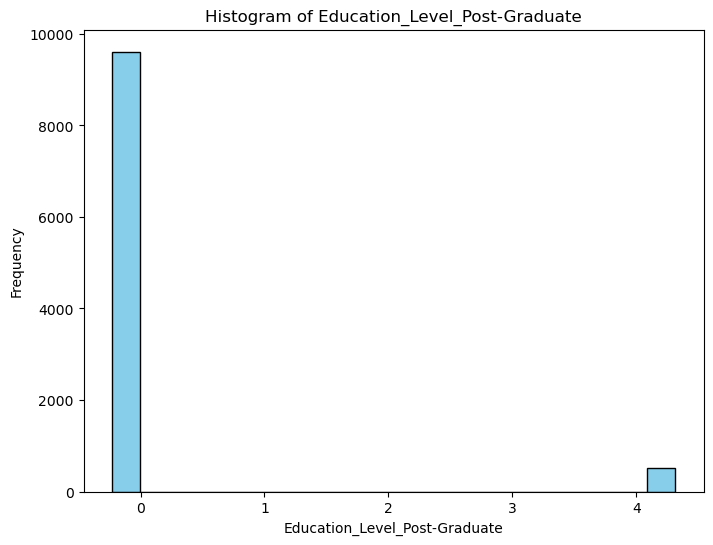

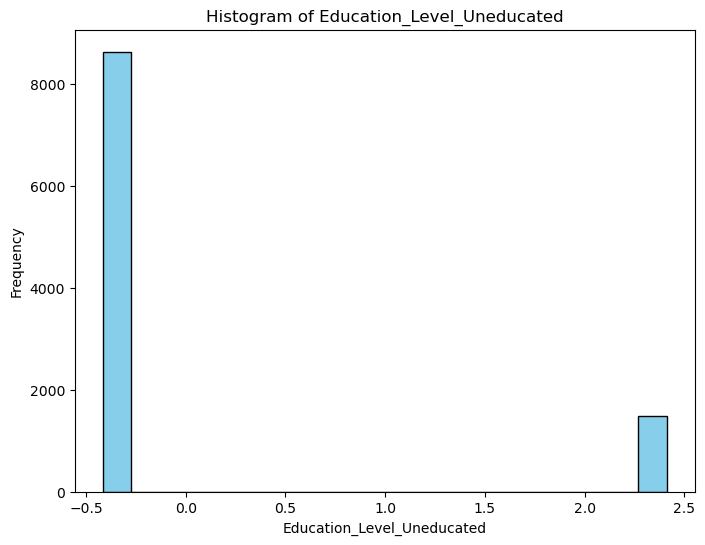

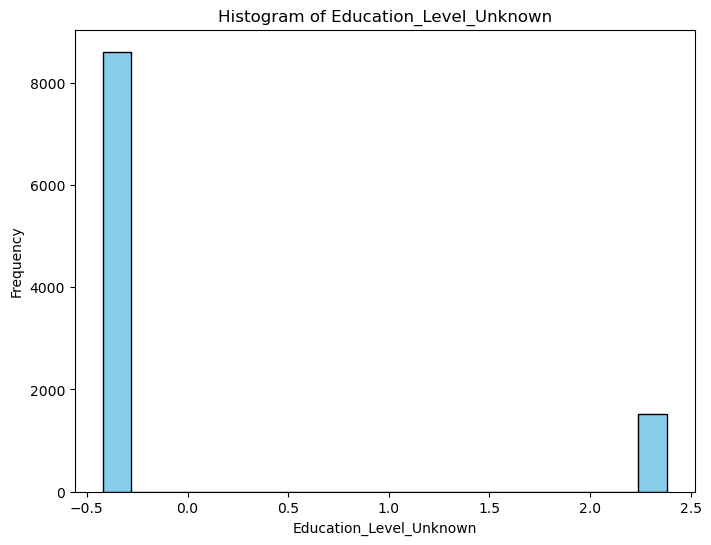

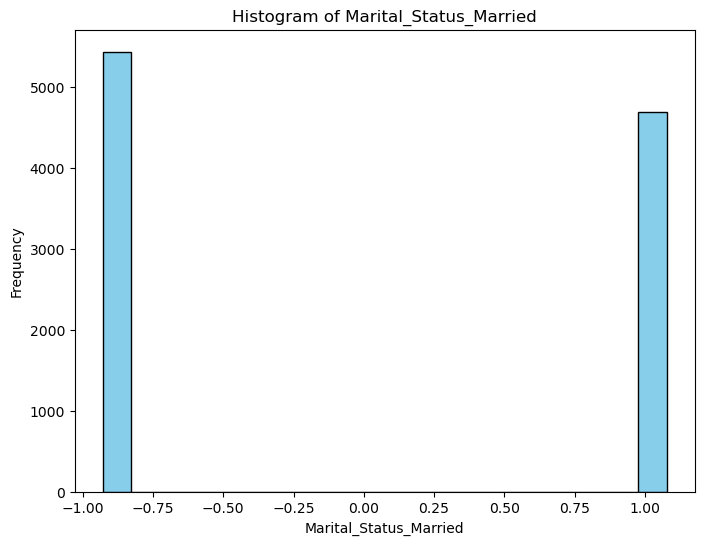

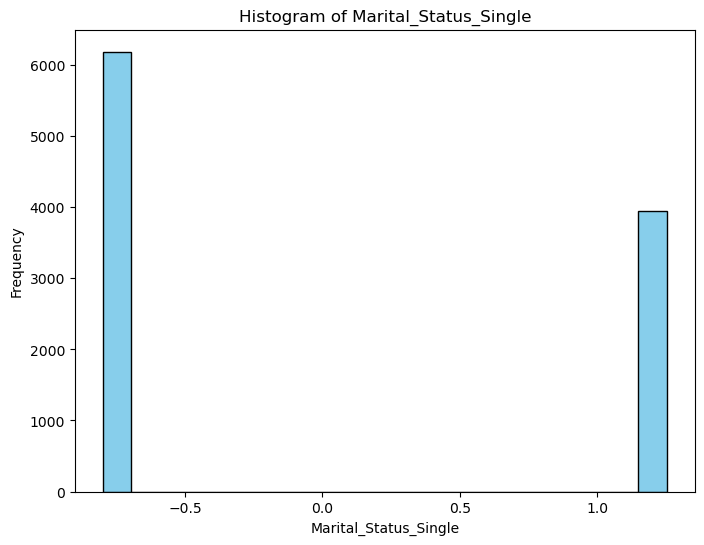

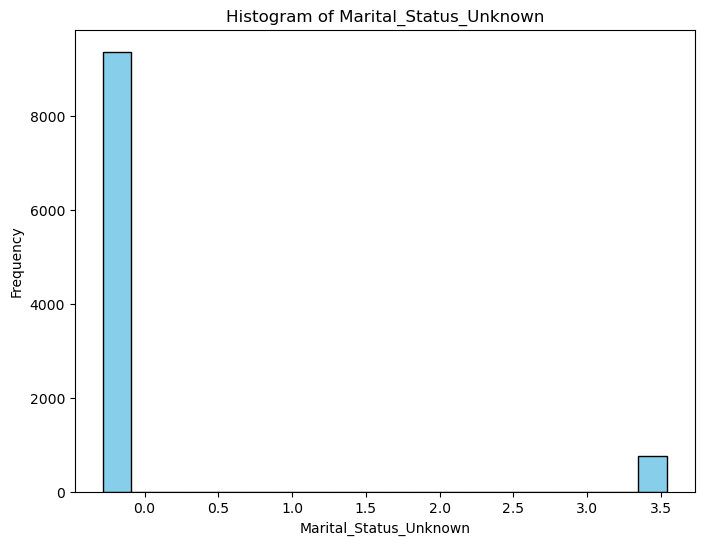

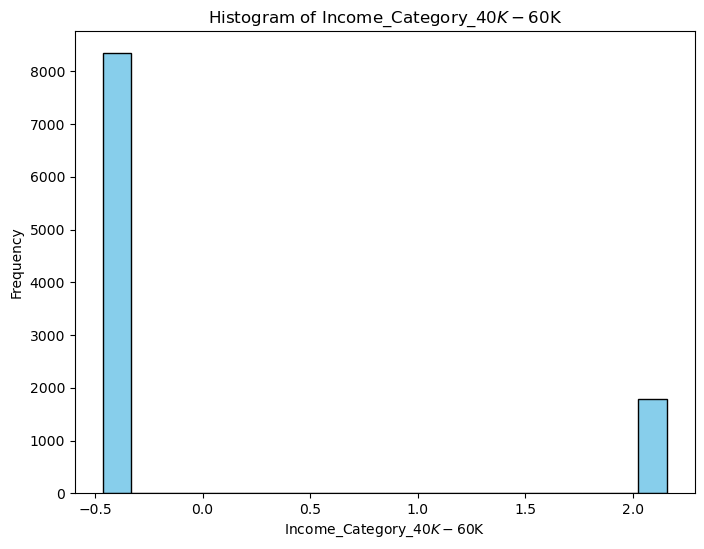

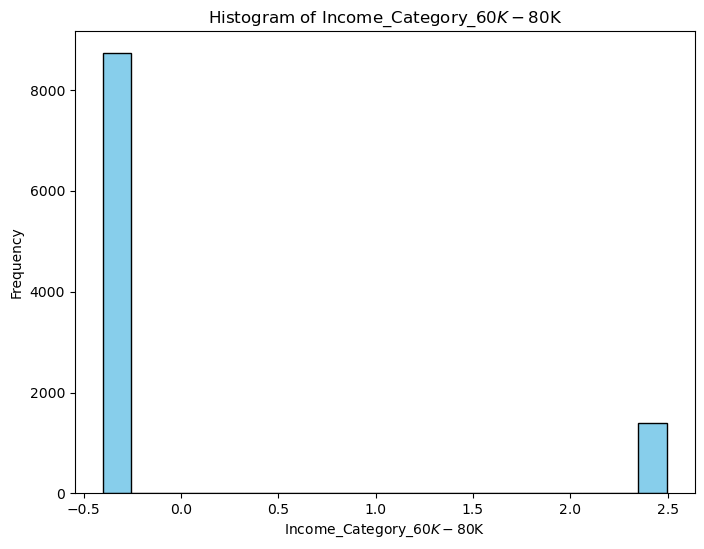

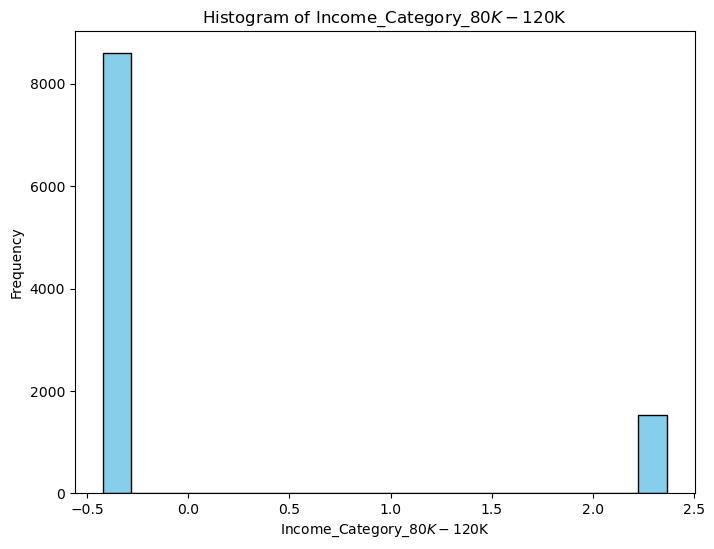

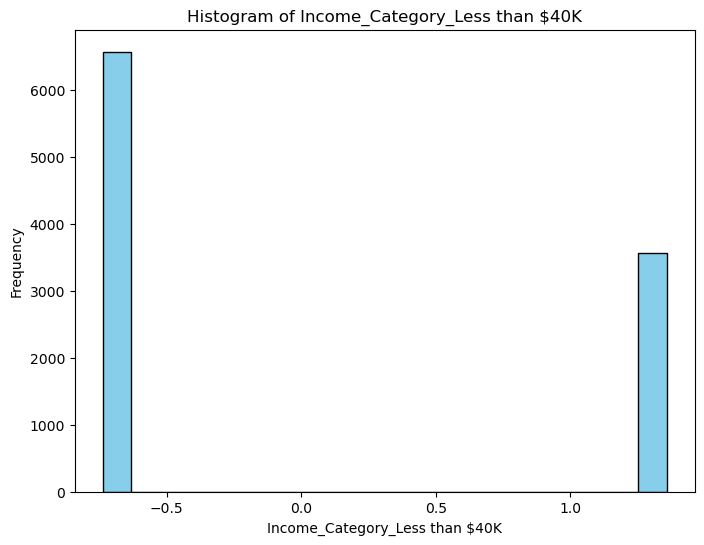

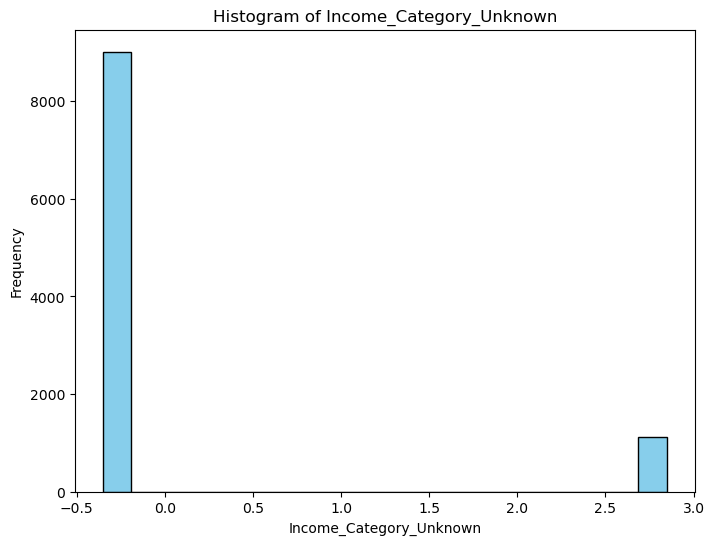

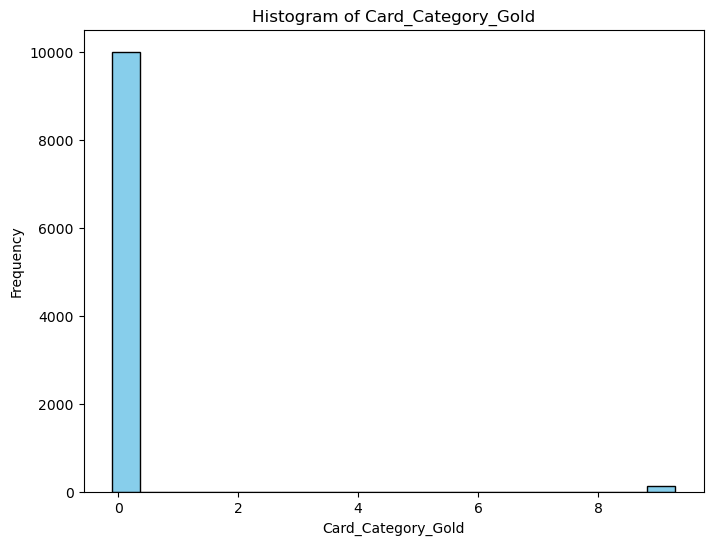

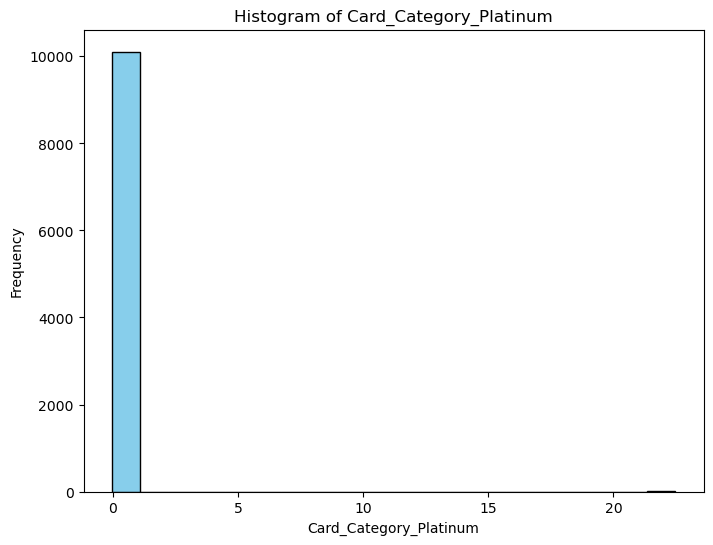

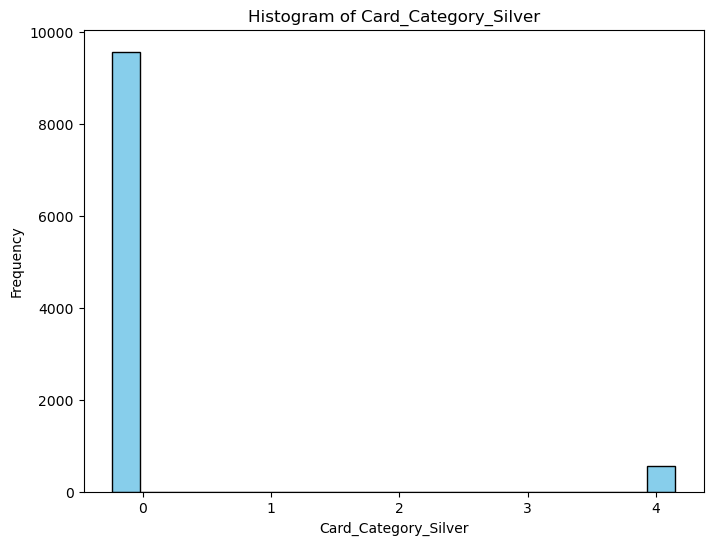

Done


In [17]:
# Test
automated_eda = AutomatedEDA()

# Load and preprocess data from CSV (change the file path and format type accordingly)
#data = automated_eda.load_data('International_Report_Departures.csv', 'csv')
filename = input("Please enter file name:")
filetype = input("Please enter file type:")
print("File is: " + filename)
data = automated_eda.load_data(filename, filetype)
preprocessed_data = automated_eda.preprocess_data(data)

# Plot histograms for all numeric columns using Matplotlib
automated_eda.plot_histograms(preprocessed_data)
